<a href="https://www.kaggle.com/code/khoshbayani/news-classification-with-svm?scriptVersionId=169587550" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
data = pd.read_csv("/kaggle/input/news-texts/news.csv",encoding="utf-8")

In [3]:
data.head()

,date,text,label
0,2018-01-04T15:35:56,Farmers will get subsidies for turning fields ...,politic
1,2018-01-04T15:35:57,Vanuatu bans non-biodegradable plastic to prot...,politic
2,2018-01-04T17:00:49,Ex-British PM Tony Blair ups calls for Labour ...,politic
3,2018-01-04T17:00:50,UK's Tony Blair argues voters deserve another ...,politic
4,2018-01-04T18:01:34,Germany had so much renewable energy over Chri...,politic


In [4]:
data.isna().sum()

date      0
text     18
label     0
dtype: int64

In [5]:
data.dropna(inplace=True)
data.isna().sum()

date     0
text     0
label    0
dtype: int64

In [6]:
data.shape

(127375, 3)

In [7]:
data.nunique()

date     127214
text     124534
label         3
dtype: int64

As it mentioned in description , there are thee unique labels

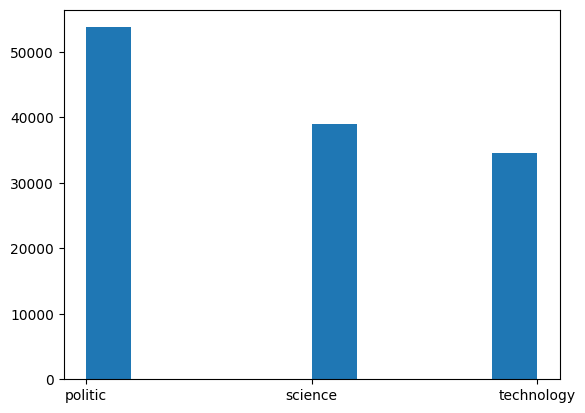

In [8]:
plt.hist(data['label'])
plt.show()

The count of these three categories are not equal,
So let's make all of them equal

In [9]:
uniq_labels_and_counts = np.unique(data['label'],return_counts=True)
labels = uniq_labels_and_counts[0]
counts = uniq_labels_and_counts[1]

minimum_count = min(counts)

In [10]:
choosen_politic_data = data[data['label'] == "politic"].sample(n=minimum_count,random_state=123)
choosen_science_data = data[data['label'] == "science"].sample(n=minimum_count,random_state=123)
choosen_technology_data = data[data['label'] == "technology"].sample(n=minimum_count,random_state=123) #it contains all technology category rows

In [11]:
equal_df = pd.concat([choosen_politic_data,choosen_science_data,choosen_technology_data],axis="rows")
equal_df.reset_index(drop=True,inplace=True)

In [12]:
equal_df.head()

,date,text,label
0,2018-11-02T21:53:18,Khashoggi’s fiancée says Trump administration ...,politic
1,2021-04-01T18:33:26,Elite minority of frequent flyers 'cause most ...,politic
2,2021-04-18T16:23:26,Jailed Putin critic Alexei Navalny could die a...,politic
3,2023-02-23T08:12:36,6.8 magnitude earthquake shakes Tajikistan,politic
4,2023-11-21T02:12:55,Yemen's Houthis release footage of takeover of...,politic


Now there are equal amount of each category

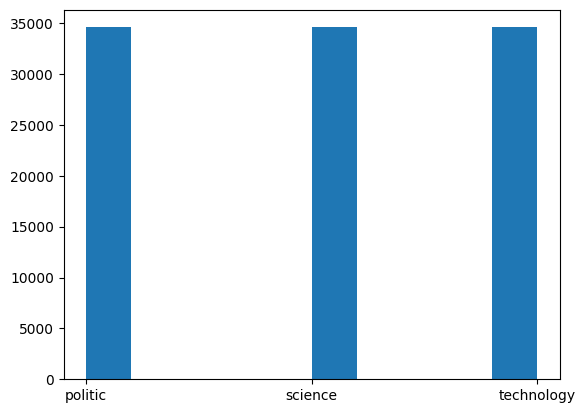

In [13]:
plt.hist(equal_df['label'])
plt.show()

Actually I don't need the datetime

In [14]:
equal_df.drop("date",axis="columns",inplace=True)

# Preprocessing Step

In [15]:
stop_words = stopwords.words("english")
stem = PorterStemmer()
def text_cleaner(text:str):
    clean_txt = ""
    text = text.lower()
    tokens = word_tokenize(text)
    for tkn in tokens:
        if (tkn not in stop_words) and (tkn not in punctuation+"’‘"):
            stm_tkn = stem.stem(tkn)
            clean_txt += (stm_tkn + " ")
    clean_txt = clean_txt[:-1]
    return clean_txt

In [16]:
equal_df['text'] = equal_df['text'].apply(text_cleaner)

In [17]:
tfidf_vectorizer = TfidfVectorizer(min_df=4)
X = tfidf_vectorizer.fit_transform(equal_df['text'])

In [18]:
y = equal_df['label']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [20]:
svm = SVC(random_state=123)
svm.fit(X_train , y_train)

SVC(random_state=123)

In [21]:
svm.score(X_train,y_train)

0.9550495533723623

In [22]:
svm.score(X_test,y_test)

0.8603218175977572